##la régression linéaire 
Dans cet exercice, vous allez mettre en oeuvre la régression linéaire et voir comment elle
fonctionne sur des données.



1. **Régression linéaire avec une seule variable:**



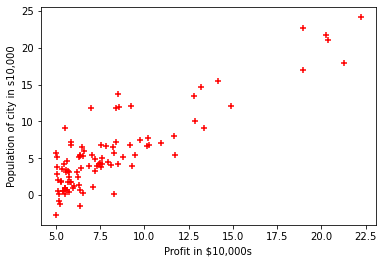

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

ex1data1 = pd.read_csv("/content/data/ex1data1.txt");
ex1data1.columns = ["X","Y"];
X= ex1data1.loc[:,"X"];
Y= ex1data1.loc[:,"Y"];

fig, ax = plt.subplots()
ax.scatter(X, Y,marker="+",c="red")
ax.set_xlabel("Profit in $10,000s")
ax.set_ylabel("Population of city in s10,000")
plt.show()

In [ ]:
def hteta(x,teta0,teta1):
  return teta1 * x + teta0

def drive0(x,y,m,teta0,teta1):
   sumd =0
   for i in range(m):
      sumd= sumd+(hteta(x[i],teta1,teta0) - y[i])
   return sumd

def drive1(x,y,m,teta0,teta1):
   sumd =0
   for i in range(m):
      sumd= sumd+((hteta(x[i],teta1,teta0) - y[i]) * x[i])
   return sumd

def gradiantDescent2(x,y,m):
  teta0_cal=teta1_cal=0
  for i in range(1000):
    teta0_cal = teta0_cal - (((0.000014) * drive0(x,y,m,teta0_cal,teta1_cal))/m)
    teta1_cal = teta1_cal - (((0.000014) * drive1(x,y,m,teta0_cal,teta1_cal))/m)
  return teta0_cal,teta1_cal

t0,t1 = gradiantDescent2(X,Y,X.count());
print(hteta(4,t0,t1));
# print(hteta(70000,t0,t1));


3.3420481628998657


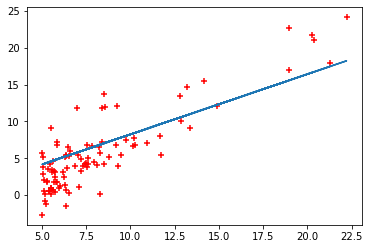

In [ ]:
Ynew = hteta(X,t0,t1)
plt.scatter(X, Y,marker="+",c="red")
plt.plot(X,Ynew)
plt.show();

## Linear regression with multiple variables

In [ ]:
ex1data2 = pd.read_csv("/content/data/ex1data2.txt");
ex1data2.columns = ["taille","nombre_chambre","prix"];

print("---moyenne de colonne--- \n",ex1data2.mean(),"\n")
print("---ecart type de chaque colonne--- \n",ex1data2.std(),"\n")

---moyenne de colonne--- 
 taille              1998.434783
nombre_chambre         3.173913
prix              339119.456522
dtype: float64 

---ecart type de chaque colonne--- 
 taille               803.333019
nombre_chambre         0.768963
prix              126103.418369
dtype: float64 



In [ ]:
NormaliseDf = ex1data2.div(ex1data2.std())
NormaliseDf

In [ ]:
def gradiantDescent3(x1,x2,y,m):
  teta0_cal=teta1_cal=teta2_cal=0
  for i in range(1000):
    teta0_cal = teta0_cal - (((0.000014)/m) * drive0(x1,y,m,teta0_cal,teta1_cal))
    teta1_cal = teta1_cal - (((0.000014)/m) * drive1(x1,y,m,teta0_cal,teta1_cal))
    teta2_cal = teta2_cal - (((0.000014)/m) * drive1(x2,y,m,teta0_cal,teta1_cal))
  return teta0_cal,teta1_cal,teta2_cal